In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

<h3>Описание полей:</h3>
client_id - идентификатор клиента <br>
Age - возраст <br>
Work_experience - стаж работы <br>
Income - доход ежегодный <br>
Family - размер членов семьи <br>
CCAvg - средний размер  трат по кредитной карте в мес. <br>
Education - образование <br> 
Mortgage - Сумма ипотеки ( если имеется) <br>
Broker_account - наличие инвестиционного счета <br>
CD Account - наличие открытого депозитного счета <br>
online_bank - пользуется онлайн-банкингом <br>
OTHER CC - имеется другая кредитная карта <br>
Personal Credit (Переменная Y) - принял ли клиент личный кредит, предложенный в ходе последней кампании или нет <br>


In [2]:
df = pd.read_csv('customer_id.csv', index_col=0)

In [3]:
df.head(10)

,client_id,Age,Work_experience,Income,Family,CCAvg,Education,Mortgage,Broker_account,CD Account,online_bank,OTHER CC,Personal Credit
0,1,25,1,1387094.94,4,41616.0,1,0.0,1,0,0,0,0
1,2,45,19,962474.04,3,39015.0,1,0.0,1,0,0,0,0
2,3,39,15,311388.66,1,26010.0,1,0.0,0,0,0,0,0
3,4,35,9,2830806.00,1,70227.0,2,0.0,0,0,0,0,0
4,5,35,8,1273862.70,4,26010.0,2,0.0,0,0,0,1,0
5,6,37,13,820933.74,4,10404.0,2,5375400.0,0,0,1,0,0
6,7,53,27,2038180.32,2,39015.0,2,0.0,0,0,1,0,0
7,8,50,24,622777.32,1,7803.0,3,0.0,0,0,0,1,0
8,9,35,10,2292952.86,3,15606.0,2,3606720.0,0,0,1,0,0
9,10,34,9,5095450.80,1,231489.0,3,0.0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        5000 non-null   int64  
 1   Age              5000 non-null   int64  
 2   Work_experience  5000 non-null   int64  
 3   Income           5000 non-null   float64
 4   Family           5000 non-null   int64  
 5   CCAvg            5000 non-null   float64
 6   Education        5000 non-null   int64  
 7   Mortgage         5000 non-null   float64
 8   Broker_account   5000 non-null   int64  
 9   CD Account       5000 non-null   int64  
 10  online_bank      5000 non-null   int64  
 11  OTHER CC         5000 non-null   int64  
 12  Personal Credit  5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 546.9 KB


In [5]:
df.value_counts()

client_id  Age  Work_experience  Income      Family  CCAvg     Education  Mortgage    Broker_account  CD Account  online_bank  OTHER CC  Personal Credit
0          0    0                0.00        0       0.0       0          0.0         0               0           0            0         0                  52
3334       37   13               2236336.74  4       2601.0    2          9710400.0   0               0           1            0         0                   1
3341       29   3                1528635.24  4       46818.0   3          0.0         0               0           0            0         0                   1
3340       27   1                3991436.46  4       132651.0  3          12276720.0  0               0           0            0         1                   1
3339       35   9                1217246.58  4       31212.0   2          0.0         1               0           1            0         0                   1
                                                    

В данных пристутствуют строки, для которых все значения 0.

In [6]:
df = df.loc[(df != 0).any(axis=1)]
df.drop(labels='client_id', axis=1, inplace=True)
df.shape

(4948, 12)

In [7]:
df.nunique()

Age                 44
Work_experience     44
Income             162
Family               4
CCAvg              108
Education            3
Mortgage           347
Broker_account       2
CD Account           2
online_bank          2
OTHER CC             2
Personal Credit      2
dtype: int64

В наборе данных есть как числовые, так и категориальные признаки.

In [8]:
num_feats = ['Age', 'Work_experience', 'Income', 'CCAvg', 'Mortgage']
cat_feats = ['Family', 'Education', 'Broker_account', 'CD Account', 'online_bank', 'OTHER CC']

<br>Основные статистики по числовым признакам:

In [9]:
df[num_feats].describe()

,Age,Work_experience,Income,CCAvg,Mortgage
count,4948.000000,4948.000000,4.948000e+03,4948.000000,4.948000e+03
mean,45.557195,20.331043,2.089544e+06,50353.425546,1.964081e+06
std,11.320735,11.311973,1.305358e+06,45457.527094,3.531426e+06
min,24.000000,0.000000,2.264645e+05,0.000000,0.000000e+00
25%,36.000000,10.750000,1.104014e+06,18207.000000,0.000000e+00
50%,46.000000,20.000000,1.811716e+06,39015.000000,0.000000e+00
75%,55.000000,30.000000,2.774190e+06,67626.000000,3.502680e+06
max,67.000000,43.000000,6.341005e+06,260100.000000,2.202180e+07


<br>Уникальные значения категориальных признаков:

In [10]:
for i in cat_feats:
    print(i, df[i].unique())

Family [4 3 1 2]
Education [1 2 3]
Broker_account [1 0]
CD Account [0 1]
online_bank [0 1]
OTHER CC [0 1]


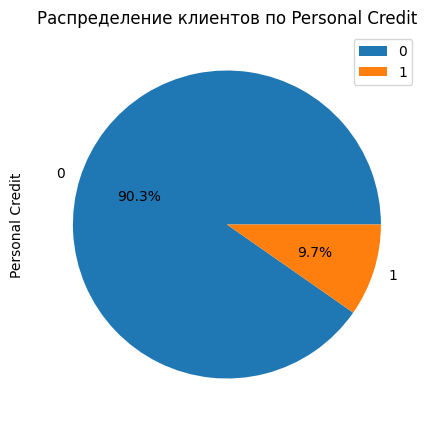

In [11]:
plt.figure(figsize=(5,5))
df['Personal Credit'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Распределение клиентов по Personal Credit')
plt.legend()
plt.show()

In [12]:
print(df['Personal Credit'].value_counts())

0    4468
1     480
Name: Personal Credit, dtype: int64


<br>Распределение числовых признаков:

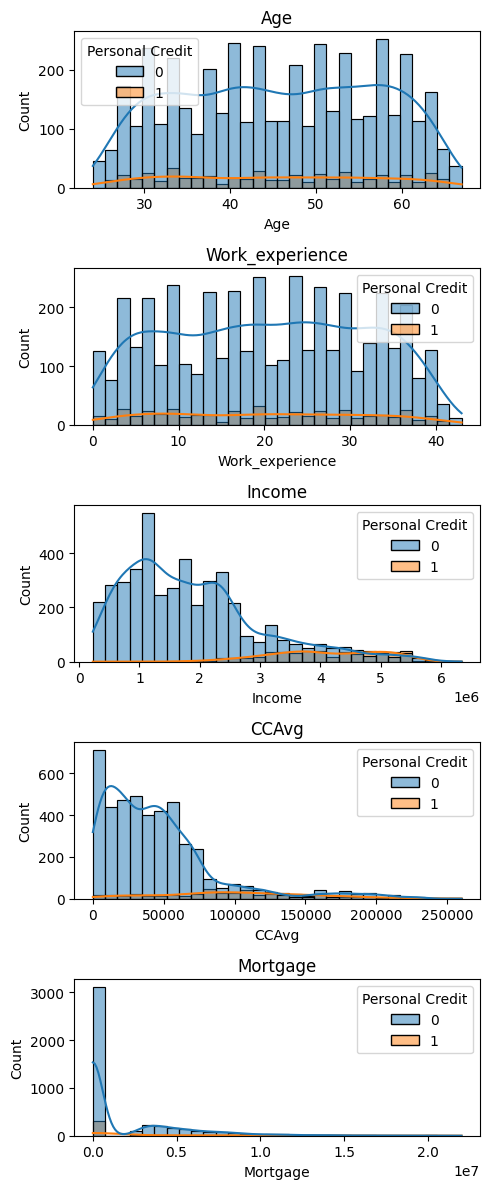

In [13]:
fig = plt.figure(figsize=(5, 12))
for i, feat_name in enumerate(num_feats):
    ax = fig.add_subplot(5, 1, i + 1)
    sns.histplot(data=df, x=feat_name, hue='Personal Credit', bins=30, kde=True, axes=ax)
    #plt.ylim([0, 150])
    ax.set_title(feat_name)
fig.tight_layout()
    

<br>Personal Credit по категориальным признакам:

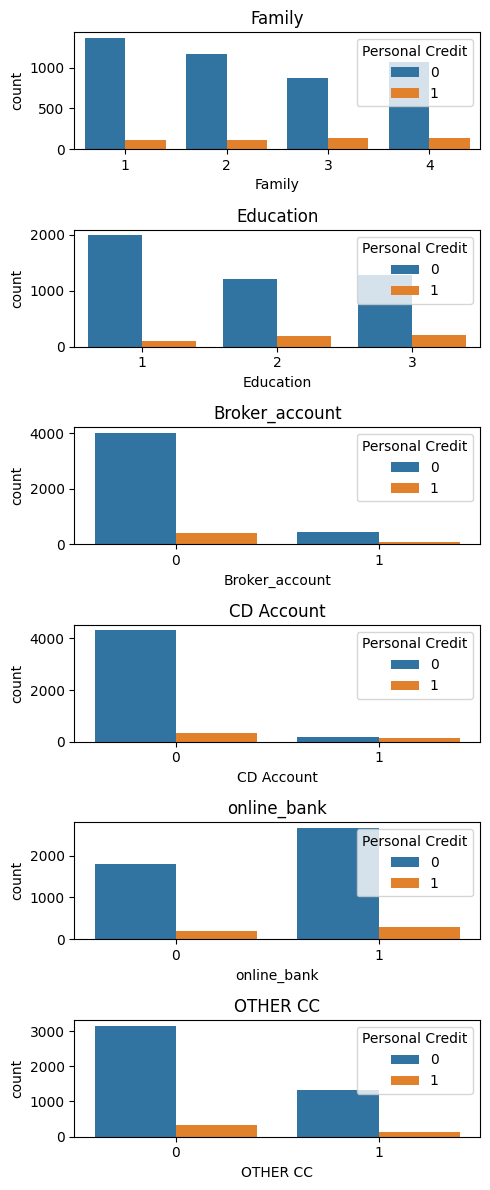

In [14]:
fig = plt.figure(figsize=(5, 12))
for i, feat_name in enumerate(cat_feats):
    ax = fig.add_subplot(6, 1, i + 1)
    sns.countplot(data=df, x=feat_name, axes=ax, hue='Personal Credit')
    ax.set_title(feat_name)
fig.tight_layout()

In [15]:
X = df.copy()
y = X.loc[:,('Personal Credit')].copy()
X.drop(labels='Personal Credit', axis=1, inplace=True)

<br>Парное отношение признаков в наборе данных:

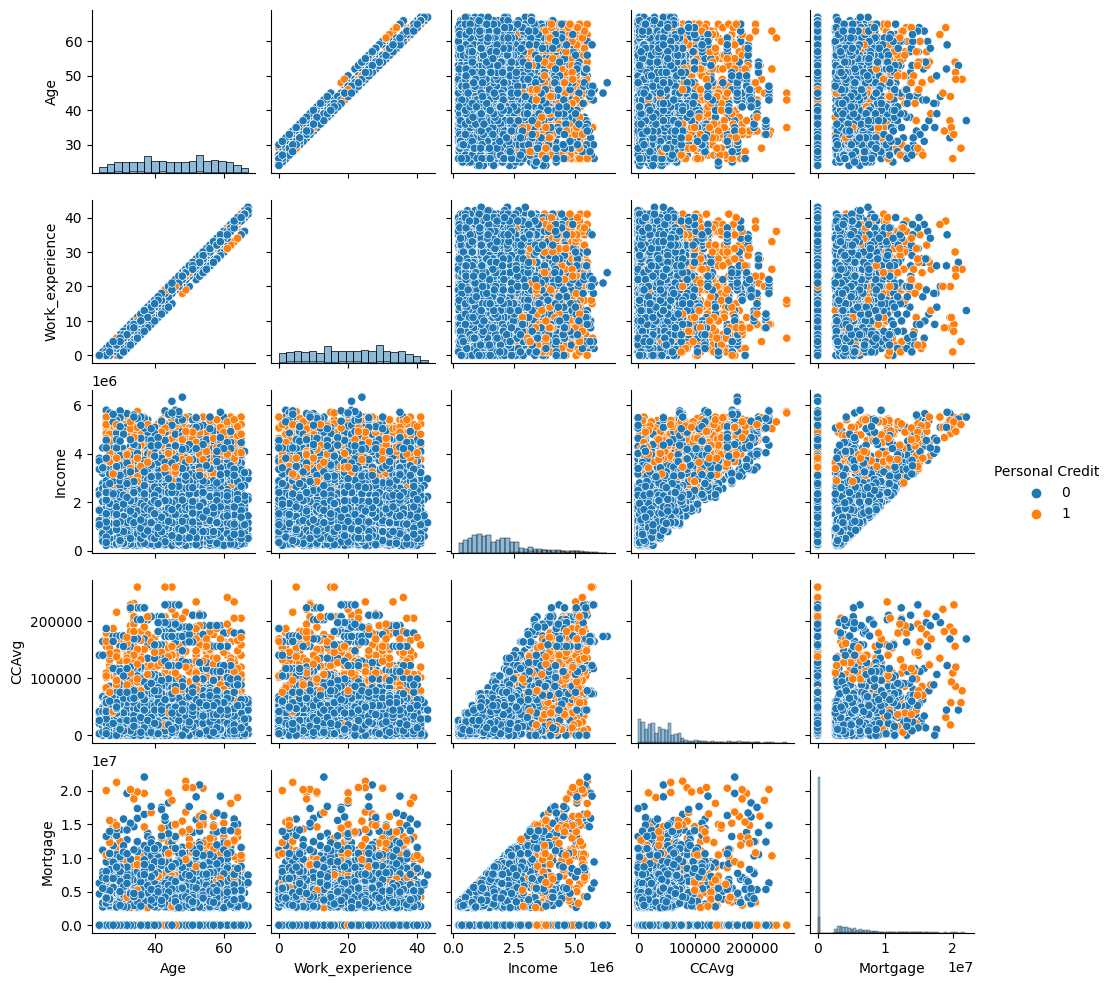

In [16]:
sns.pairplot(df[num_feats + ['Personal Credit']], diag_kind='hist', hue='Personal Credit', height=2)
plt.show()

<br>Корреляционная матрица:

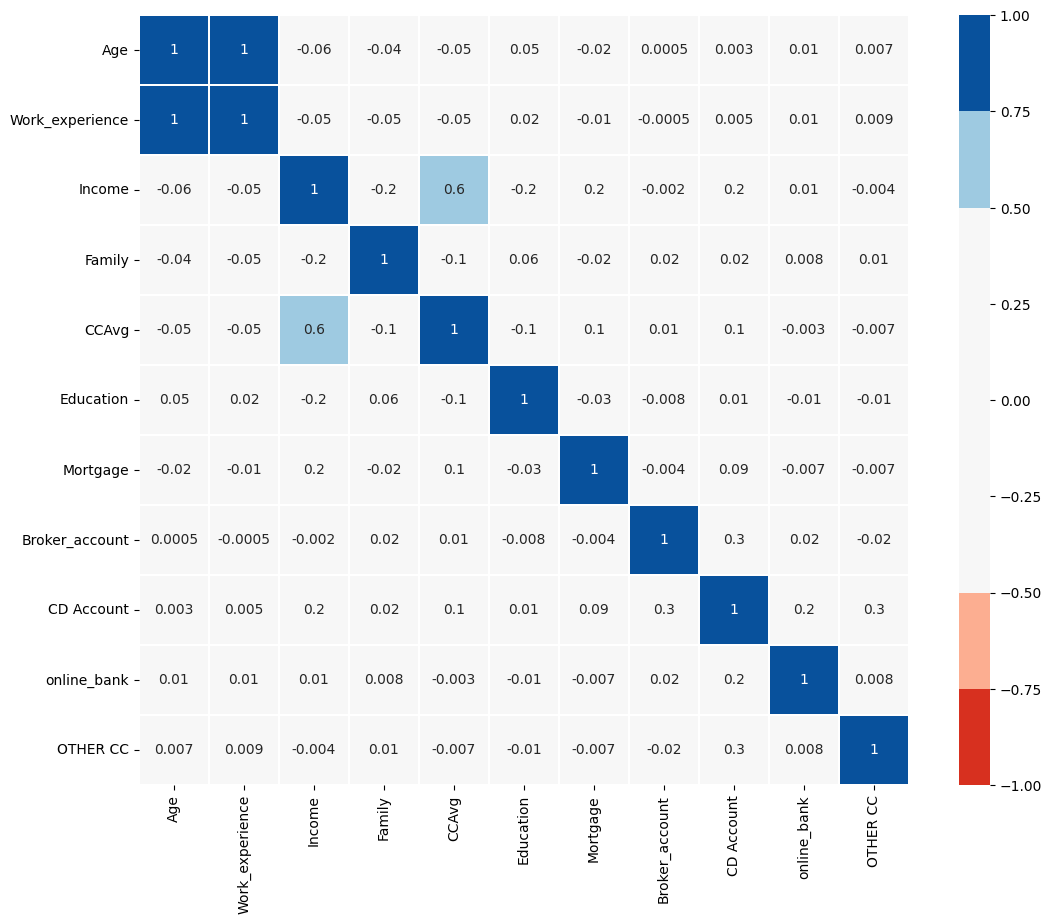

In [17]:
color_map = sns.color_palette(['#d7301f', '#fcae91', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#f7f7f7', '#9ecae1', '#08519c'])
plt.figure(figsize=(13, 10))

ax = sns.heatmap(
    X.corr(), cmap=color_map, square=True, vmin=-1, vmax=1, center= 0,
    linewidths=0.1, linecolor='white', annot=True, fmt='.1g', 
    cbar_kws=dict(ticks=np.arange(-1.0, 1.1, 0.25), aspect=25))

plt.show()

Признаки Age и Work_experience сильно коррелируют.

In [18]:
X.drop(labels=['Work_experience'], axis=1, inplace=True)

<br>Преобразование категориальные признаков:

In [19]:
X['Family'] = X['Family'].astype(object)
X['Family'] = X['Family'].map({1: 'Fam_1', 2: 'Fam_2', 3: 'Fam_3', 4: 'Fam_4'})

X['Education'] = X['Education'].astype(object)
X['Education'] = X['Education'].map({1: 'Educ_1', 2: 'Educ_2', 3: 'Educ_3'})

X = pd.get_dummies(X, columns=X.columns[X.dtypes==object])
rename_cols = {'Family_Fam_1': 'Fam_1', 'Family_Fam_2': 'Fam_2', 'Family_Fam_3': 'Fam_3', 'Family_Fam_4': 'Fam_4', 'Education_Educ_1': 'Educ_1', 'Education_Educ_2': 'Educ_2', 'Education_Educ_3': 'Educ_3'}
X.rename(columns=rename_cols, inplace=True)
print(X.head(5))

   Age      Income    CCAvg  Mortgage  Broker_account  CD Account  \
0   25  1387094.94  41616.0       0.0               1           0   
1   45   962474.04  39015.0       0.0               1           0   
2   39   311388.66  26010.0       0.0               0           0   
3   35  2830806.00  70227.0       0.0               0           0   
4   35  1273862.70  26010.0       0.0               0           0   

   online_bank  OTHER CC  Fam_1  Fam_2  Fam_3  Fam_4  Educ_1  Educ_2  Educ_3  
0            0         0      0      0      0      1       1       0       0  
1            0         0      0      0      1      0       1       0       0  
2            0         0      1      0      0      0       1       0       0  
3            0         0      1      0      0      0       0       1       0  
4            0         1      0      0      0      1       0       1       0  


In [20]:
num_feats = X.columns.to_list()[0:4]
cat_feats = X.columns.to_list()[4:]
print('Numerical features:', num_feats)
print('Categorical features:', cat_feats)

Numerical features: ['Age', 'Income', 'CCAvg', 'Mortgage']
Categorical features: ['Broker_account', 'CD Account', 'online_bank', 'OTHER CC', 'Fam_1', 'Fam_2', 'Fam_3', 'Fam_4', 'Educ_1', 'Educ_2', 'Educ_3']


<br>Масштабируем числовые признаки в диапазон от 0 до 1:

In [21]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

print(X_scaled)

           Age    Income  CCAvg  Mortgage  Broker_account  CD Account  \
0     0.023256  0.189815   0.16  0.000000             1.0         0.0   
1     0.488372  0.120370   0.15  0.000000             1.0         0.0   
2     0.348837  0.013889   0.10  0.000000             0.0         0.0   
3     0.255814  0.425926   0.27  0.000000             0.0         0.0   
4     0.255814  0.171296   0.10  0.000000             0.0         0.0   
...        ...       ...    ...       ...             ...         ...   
4995  0.116279  0.148148   0.19  0.000000             0.0         0.0   
4996  0.139535  0.032407   0.04  0.133858             0.0         0.0   
4997  0.906977  0.074074   0.03  0.000000             0.0         0.0   
4998  0.953488  0.189815   0.05  0.000000             0.0         0.0   
4999  0.093023  0.347222   0.08  0.000000             0.0         0.0   

      online_bank  OTHER CC  Fam_1  Fam_2  Fam_3  Fam_4  Educ_1  Educ_2  \
0             0.0       0.0    0.0    0.0    0.0

<hr>
<h3>KMeans кластеризация</h3>
Стандартный алгоритм KMeans напрямую не применим к категориальным данным (при включении категориальных признаков, KMeans разделяет набор данных на кластеры по категориальным признакам: Family, Education...), поэтому оставим только числовые признаки.

In [22]:
max_clusters = np.arange(2, 11)
X_scaled_kmeans = X_scaled.copy()
X_scaled_kmeans.drop(labels=cat_feats+['Age'], axis=1, inplace=True)

<br>Оптимальное количество кластеров алгоритма KMeans определяем по методу локтя и методу силуэта:

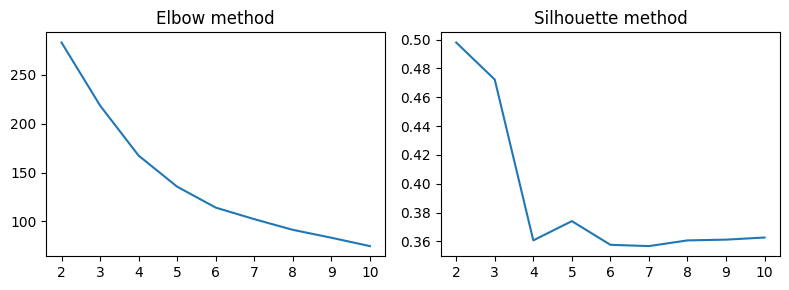

In [23]:
inertias = []
silhouettes = []
for k in max_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X_scaled_kmeans)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled_kmeans, kmeans.labels_))

fig = plt.figure(figsize=(8, 3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(max_clusters, inertias)
ax.set_title('Elbow method')
ax.set_xticks(np.arange(min(max_clusters), max(max_clusters)+1, 1.0))

ax = fig.add_subplot(1, 2, 2)
ax.plot(max_clusters, silhouettes)
ax.set_title('Silhouette method')
ax.set_xticks(np.arange(min(max_clusters), max(max_clusters)+1, 1.0))
fig.tight_layout()

    

<br>Построение модели кластеризации и визуализация результата кластеризации при помощи методов понижения размерности:

C:\Users\andre\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\andre\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'TSNE')

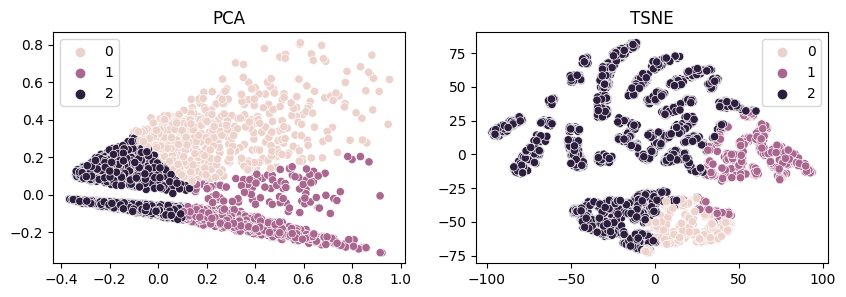

In [24]:
kmeans_model = KMeans(n_clusters=3).fit(X_scaled_kmeans)
X_pca_kmeans = PCA(n_components=2).fit_transform(X_scaled_kmeans)
X_tsne_kmeans = TSNE(n_components=2).fit_transform(X_scaled_kmeans)

fig, axes = plt.subplots(1, 2, figsize=(10,3))

sns.scatterplot(x=X_pca_kmeans[:, 0], y=X_pca_kmeans[:, 1], ax=axes[0], hue=kmeans_model.labels_)
sns.scatterplot(x=X_tsne_kmeans[:, 0], y=X_tsne_kmeans[:, 1], ax=axes[1], hue=kmeans_model.labels_)
axes[0].set_title('PCA')
axes[1].set_title('TSNE')


<br>Вывод средних значений признаков по полученным кластерам, распределение Personal Credit по кластерам.

2    3461
1     923
0     564
Name: label, dtype: int64
label              0           1           2
Income    3094964.37  3933378.87  1433977.86
CCAvg       66610.50   108890.03    32093.30
Mortgage  9759038.09   536882.47  1074438.71


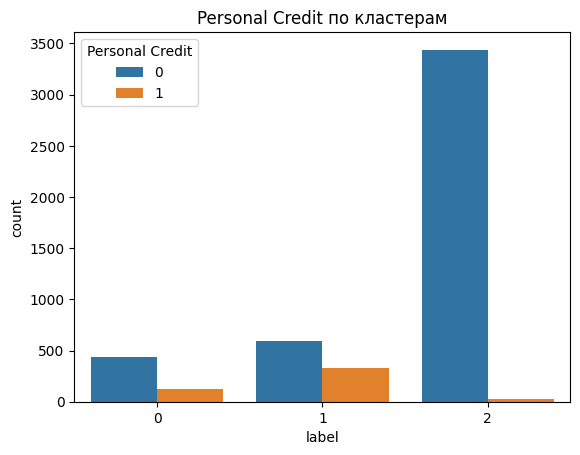

In [25]:
X_interp_kmeans = X[X_scaled_kmeans.columns.to_list()].copy()
X_interp_kmeans['label'] = kmeans_model.labels_
print(X_interp_kmeans['label'].value_counts())
print(X_interp_kmeans.groupby('label').mean().T.round(2))
X_interp_kmeans = pd.concat([X_interp_kmeans, y], axis=1)

ax = sns.countplot(data=X_interp_kmeans, x='label', hue='Personal Credit')
ax.set_title('Personal Credit по кластерам')
plt.show()

In [26]:
X_interp_kmeans.groupby('label')['Personal Credit'].value_counts()

label  Personal Credit
0      0                   439
       1                   125
1      0                   590
       1                   333
2      0                  3439
       1                    22
Name: Personal Credit, dtype: int64

Из полученных результатов кластеризации KMeans можно выделить следующие сегменты клиентов:
    <ul>
    <li>Кластер 0 - клиенты со средним (выше среднего) годовым доходом, со средними ежемесячными тратами, наибольшей суммой ипотеки.
    </li>
    <li>Кластер 1 - клиенты с высоким годовым доходом, высокими ежемесячными тратами и малой суммой ипотеки. К данному сегменту относятся <b>потенциальные клиенты</b>, которые с большей вероятностью заинтересуются предложением.
    </li>
    <li>Кластер 2 - клиенты с малым годовым доходом, малыми ежемесячными тратами. К данному сегменту относятся клиенты, которые с большей вероятностью <b>откажутся</b> от предложения.</li>
    </ul>
<hr>

<h3>KPrototypes кластеризация</h3>
Алгоритм KPrototypes предназначен для кластеризации наборов данных смешанного типа (присутствуют как числовые признаки, так и категориальные).

In [27]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [28]:
X_scaled_kprot = X_scaled.copy()
# Добавление бинарного признака наличия ипотеки
# X_scaled_kprot.loc[:, 'Binary_mortgage'] = (X_scaled['Mortgage'] > 0).astype(int)
X_scaled_kprot.drop(labels=['Age', 'Fam_1', 'Fam_2', 'Fam_3', 'Fam_4', 'Educ_1', 'Educ_2', 'Educ_3'], axis=1, inplace=True)
print(X_scaled_kprot)

        Income  CCAvg  Mortgage  Broker_account  CD Account  online_bank  \
0     0.189815   0.16  0.000000             1.0         0.0          0.0   
1     0.120370   0.15  0.000000             1.0         0.0          0.0   
2     0.013889   0.10  0.000000             0.0         0.0          0.0   
3     0.425926   0.27  0.000000             0.0         0.0          0.0   
4     0.171296   0.10  0.000000             0.0         0.0          0.0   
...        ...    ...       ...             ...         ...          ...   
4995  0.148148   0.19  0.000000             0.0         0.0          1.0   
4996  0.032407   0.04  0.133858             0.0         0.0          1.0   
4997  0.074074   0.03  0.000000             0.0         0.0          0.0   
4998  0.189815   0.05  0.000000             0.0         0.0          1.0   
4999  0.347222   0.08  0.000000             0.0         0.0          1.0   

      OTHER CC  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4 

In [29]:
max_clusters = np.arange(2, 11)

<br>
Используем метод локтя для определения оптимального количества кластеров:

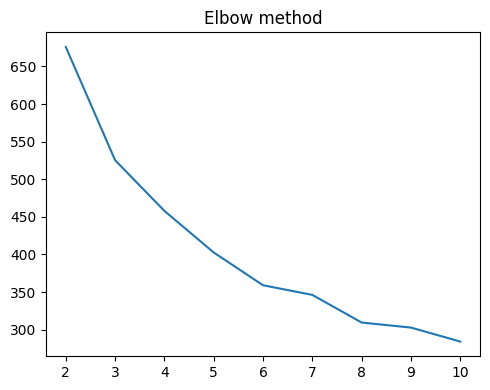

In [30]:
costs = []
for k in max_clusters:
    kproto = KPrototypes(n_clusters=k, max_iter=300, init='Cao', n_init=10, n_jobs=12)
    kproto = kproto.fit(X_scaled_kprot, categorical=list(range(3, 7)))
    costs.append(kproto.cost_)

fig = plt.figure(figsize=(5, 4))

plt.plot(max_clusters, costs)
plt.title('Elbow method')
plt.xticks(np.arange(min(max_clusters), max(max_clusters)+1, 1.0))
plt.tight_layout()

<br>Построение модели кластеризации:

In [31]:
kp = KPrototypes(n_clusters=6, max_iter=300, init='Cao', n_init=10, n_jobs=12)
kp_clusters = kp.fit(X_scaled_kprot, categorical=list(range(3, 7)))


<br>Визуализация результата кластеризации при помощи методов понижения размерности:

C:\Users\andre\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\andre\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'TSNE')

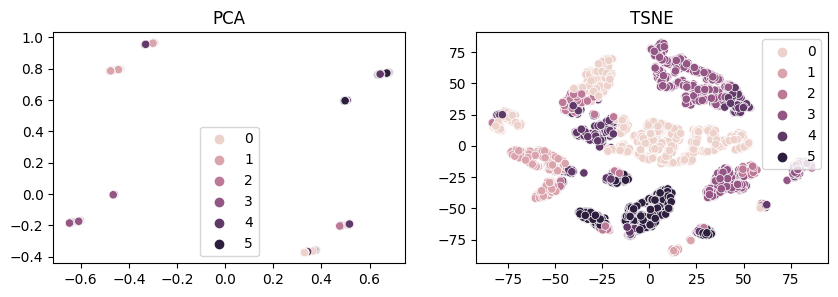

In [32]:
X_pca_kprot = PCA(n_components=2).fit_transform(X_scaled_kprot)
X_tsne_kprot = TSNE(n_components=2).fit_transform(X_scaled_kprot)

fig, axes = plt.subplots(1, 2, figsize=(10,3))

sns.scatterplot(x=X_pca_kprot[:, 0], y=X_pca_kprot[:, 1], ax=axes[0], hue=kp_clusters.labels_)
sns.scatterplot(x=X_tsne_kprot[:, 0], y=X_tsne_kprot[:, 1], ax=axes[1], hue=kp_clusters.labels_)
axes[0].set_title('PCA')
axes[1].set_title('TSNE')

0    1600
3    1160
5     710
4     627
1     513
2     338
Name: label, dtype: int64
label                    0           1            2           3           4  \
Income          1549972.44  1732916.80   3746797.87  1631959.66  4248060.09   
CCAvg             33718.55    39194.48     83503.64    36246.73   127529.89   
Mortgage        1256152.95  1528759.30  11449735.38  1456589.90   596418.56   
Broker_account        0.11        0.10         0.10        0.11        0.11   
CD Account            0.01        0.02         0.16        0.00        0.14   
online_bank           1.00        0.00         0.67        0.00        0.67   
OTHER CC              0.00        1.00         0.24        0.00        0.24   

label                    5  
Income          1615632.69  
CCAvg             35014.96  
Mortgage        1395161.75  
Broker_account        0.09  
CD Account            0.18  
online_bank           1.00  
OTHER CC              1.00  


<AxesSubplot:xlabel='label', ylabel='count'>

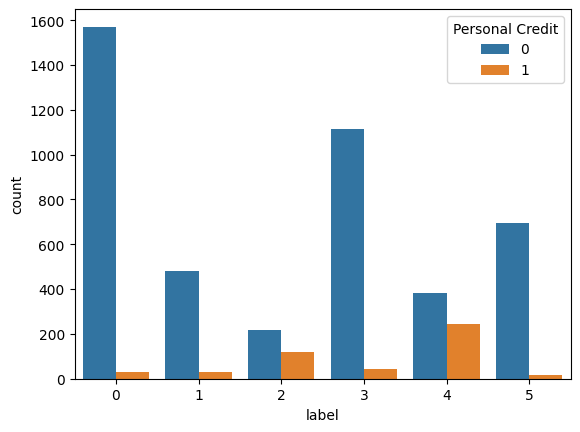

In [33]:
X_interp_kprot = X[X_scaled_kprot.columns.to_list()].copy()
X_interp_kprot['label'] = kp_clusters.labels_
print(X_interp_kprot['label'].value_counts())
print(X_interp_kprot.groupby('label').mean().T.round(2))
X_interp_kprot = pd.concat([X_interp_kprot, y], axis=1)

sns.countplot(data=X_interp_kprot, x='label', hue='Personal Credit')

In [34]:
X_interp_kprot.groupby('label')['Personal Credit'].value_counts()

label  Personal Credit
0      0                  1571
       1                    29
1      0                   483
       1                    30
2      0                   219
       1                   119
3      0                  1116
       1                    44
4      0                   384
       1                   243
5      0                   695
       1                    15
Name: Personal Credit, dtype: int64

Из полученных результатов кластеризации KPrototypes можно выделить следующие сегменты клиентов:
    <ul>
    <li>Кластеры 0, 1, 3, 5 - клиенты с примерно одинаковыми средними годовыми доходами, ежемесячными тратами и суммой ипотеки, разделенные на кластеры по пользованию онлайн банком (online_bank) и наличию карт других банков (OTHER CC).</li>
    <li>Кластер 2 - клиенты с высоким годовым доходом, высокими ежемесячными тратами и наибольшей суммой ипотеки.</li>
    <li>Кластер 4 - клиенты с наибольшим годовым доходом, наибольшими ежемесячными тратами и малой суммой ипотеки.</li>
    </ul>
     Клиенты 2 и 4 кластеров с большей вероятностью могут заинтересоваться предложением банка. Наибольшее количество клиентов принявших предложения принадлежит 4 кластеру.
<hr>